In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [48]:
raw_df = pd.read_csv('../score_cmn_1024.csv')
# raw_df = raw_df[raw_df["ref"].apply(lambda x: 'spk099' in x)]
# raw_df = raw_df[raw_df["ref"].apply(lambda x: 'spk100' in x)]
# raw_df = raw_df[raw_df["ref"].apply(lambda x: 'spk101' in x)]
# raw_df = raw_df[raw_df["ref"].apply(lambda x: 'spk102' in x)]

In [49]:
print('help')
for nfeat in range(1,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  print("nfeat", nfeat)
  print('fpr___ tpr___ threshold')
  for i in range(len(fpr)):
    if(fpr[i] >= 0.03):
      print("{:.4f} {:.4f} {:.4f}".format(fpr[i-1], tpr[i-1], -thresholds[i-1]))
      print("{:.4f} {:.4f} {:.4f}".format(fpr[i], tpr[i], -thresholds[i]))
      break

help
nfeat 1
fpr___ tpr___ threshold
0.0069 0.0000 44.4350
0.0347 0.0000 54.0703
nfeat 2
fpr___ tpr___ threshold
0.0069 0.0000 68.9285
0.0417 0.0000 79.5057
nfeat 3
fpr___ tpr___ threshold
0.0278 0.1667 117.7267
0.1042 0.1667 135.8686
nfeat 4
fpr___ tpr___ threshold
0.0208 0.1667 136.2257
0.0625 0.1667 148.9964
nfeat 5
fpr___ tpr___ threshold
0.0208 0.1667 156.5786
0.0486 0.1667 170.4910
nfeat 6
fpr___ tpr___ threshold
0.0139 0.1667 171.1525
0.0486 0.1667 184.7591
nfeat 7
fpr___ tpr___ threshold
0.0139 0.1667 182.5220
0.0417 0.1667 200.7376
nfeat 8
fpr___ tpr___ threshold
0.0139 0.1667 194.6035
0.0347 0.1667 211.8796
nfeat 9
fpr___ tpr___ threshold
0.0069 0.1667 205.0010
0.0347 0.1667 220.5060
nfeat 10
fpr___ tpr___ threshold
0.0278 0.3333 229.6308
0.0764 0.3333 254.3843
nfeat 11
fpr___ tpr___ threshold
0.0208 0.3333 238.7408
0.0625 0.3333 258.7067
nfeat 12
fpr___ tpr___ threshold
0.0278 0.3333 246.2835
0.0694 0.3333 273.0513
nfeat 13
fpr___ tpr___ threshold
0.0208 0.3333 255.0371
0.12

help


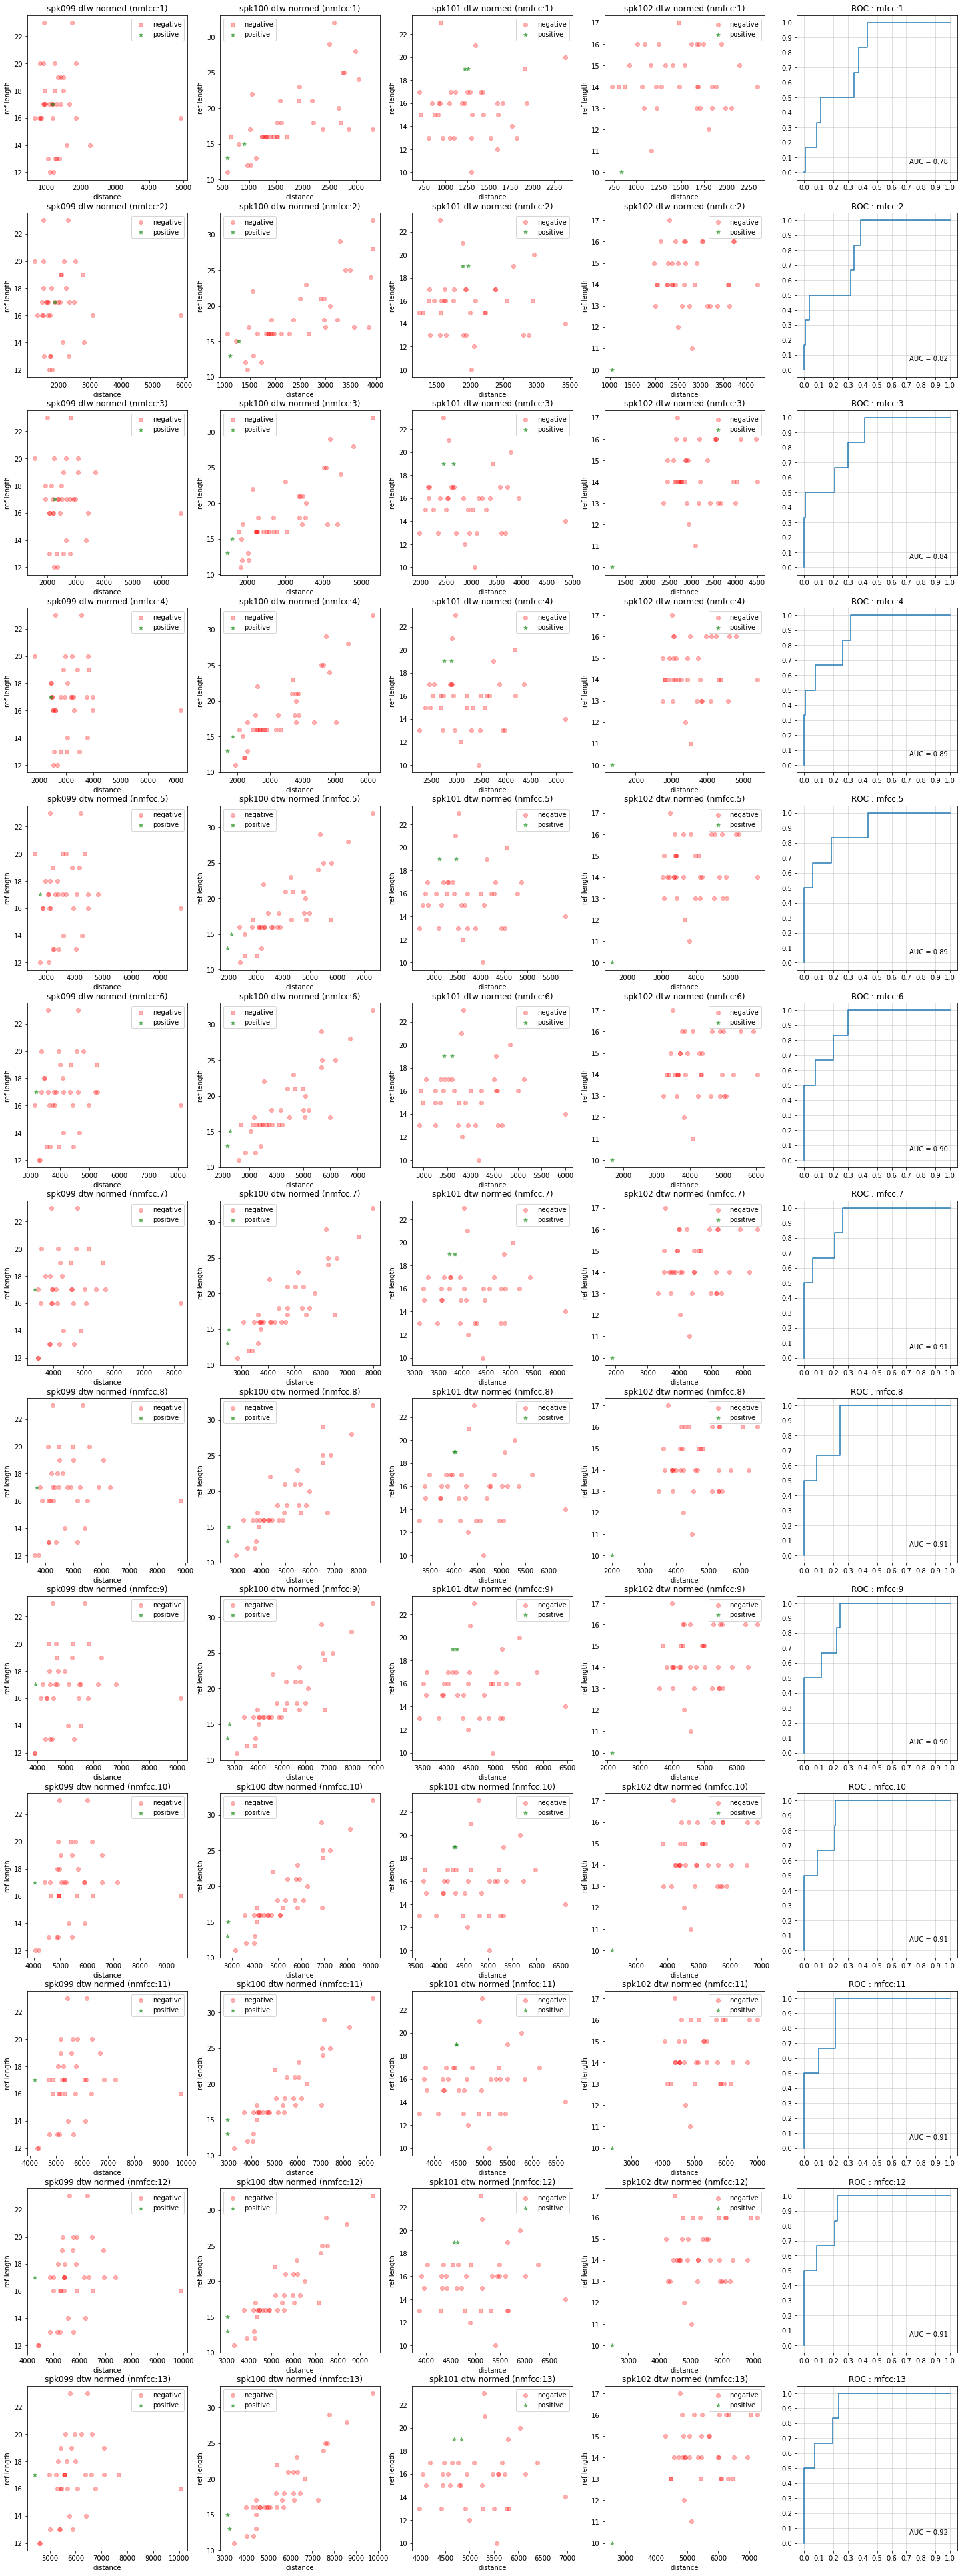

In [47]:
print('help')
plt.figure(figsize=(25, 70))

for nfeat in range(1,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  

  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
    plt.subplot(13,5,((nfeat-1)*5) + i+1 )

    sel_spk = df["ref"].apply(lambda x: spk in x)   
    plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
    plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5)

    plt.title(f'{spk} dtw normed (nmfcc:{nfeat})')
    plt.xlabel('distance')
    plt.ylabel('ref length')
    plt.legend()

  
  plt.subplot(13,5, nfeat*5)
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
  plt.xticks(np.arange(0,1.1,0.1))
  plt.yticks(np.arange(0,1.1,0.1))

  plt.grid(alpha=0.5)
#   plt.show()
# plt.savefig('roc.pdf', bbox_inches='tight')